In [1]:
import os, random
import matplotlib.pyplot as plt
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np
import pandas as pd

%matplotlib inline

r_seed = 101

gum.initRandom(r_seed) 
random.seed(r_seed)

In [2]:
#'Sex{1|2}->Demographyc{1|2|3};' +
bn = gum.fastBN('Age{18-24|25-34|35-64}->Demographyc{male|female};' +
                                
                'diligence{1|2|3|4|5}->conscientiouness{R|S};'+
                'prudence{1|2|3|4|5}->conscientiouness;'+
                'flexibility{1|2|3|4|5}->agreeableness{R|S};'+
                'gentleness{1|2|3|4|5}->agreeableness;'+
                'patience{1|2|3|4|5}->agreeableness;'+
                'fairness{1|2|3|4|5}->honesty{R|S};'+
                'greed_avoidance{1|2|3|4|5}->honesty;'+
                'modesty{1|2|3|4|5}->honesty;'+
                'sincerity{1|2|3|4|5}->honesty;'+
                'liveliness{1|2|3|4|5}->extraversion{R|S};'+
                'sociability{1|2|3|4|5}->extraversion;'+
                'social_boldness{1|2|3|4|5}->extraversion;'+
                'openess{1|2|3|4|5}->experience{R|S};'+
                'dependence{1|2|3|4|5}->emotionality{R|S};'+
                
                'conscientiouness->Psychological_traits{R|S};'+
                'agreeableness->Psychological_traits;'+
                'honesty->Psychological_traits;'+
                'extraversion->Psychological_traits;'+
                'emotionality->Psychological_traits;'+
                'experience->Psychological_traits;'+
                
                'Demographyc->Personal_trait{R|N|S};'+
                'Psychological_traits->Personal_trait;'+
                                
                'rr_min{1|2|3}->CognitiveLoad_by_RR{Rest|Load};' +
                'rr_max{1|2|3}->CognitiveLoad_by_RR{Rest|Load};' +
                
                'hr_min{1|2|3}->CognitiveLoad_by_HR{Rest|Load};' +
                'hr_max{1|2|3}->CognitiveLoad_by_HR{Rest|Load};' +
                'hr_q25{1|2|3}->CognitiveLoad_by_HR{Rest|Load};' +
                'hr_q50{1|2|3}->CognitiveLoad_by_HR{Rest|Load};' +
                'hr_q75{1|2|3}->CognitiveLoad_by_HR{Rest|Load};' +
                
                'temp_mean{1|2|3}->CognitiveLoad_by_temp{Rest|Load};' +
                'temp_min{1|2|3}->CognitiveLoad_by_temp{Rest|Load};' +
                'temp_q25{1|2|3}->CognitiveLoad_by_temp{Rest|Load};' +
                'temp_q50{1|2|3}->CognitiveLoad_by_temp{Rest|Load};' +
                'temp_q75{1|2|3}->CognitiveLoad_by_temp{Rest|Load};' +
                'temp_max{1|2|3}->CognitiveLoad_by_temp{Rest|Load};' +
                'temp_max_min{1|2|3}->CognitiveLoad_by_temp{Rest|Load};' +
                
                'gsr_min{1|2|3}->CognitiveLoad_by_GSR{Rest|Load};' +
                'gsr_max_min{1|2|3}->CognitiveLoad_by_GSR{Rest|Load};' +
              
                'CognitiveLoad_by_RR->Physiological_workload_markers{Rest|Load};' +
                'CognitiveLoad_by_HR->Physiological_workload_markers;' +
                'CognitiveLoad_by_temp->Physiological_workload_markers;' +
                'CognitiveLoad_by_GSR->Physiological_workload_markers;'+
                
                'Personal_trait->Workload{Rest|Load}<-Physiological_workload_markers;'

                
                
                )


gnb.sideBySide(bn, gnb.getInference(bn, size='50'))

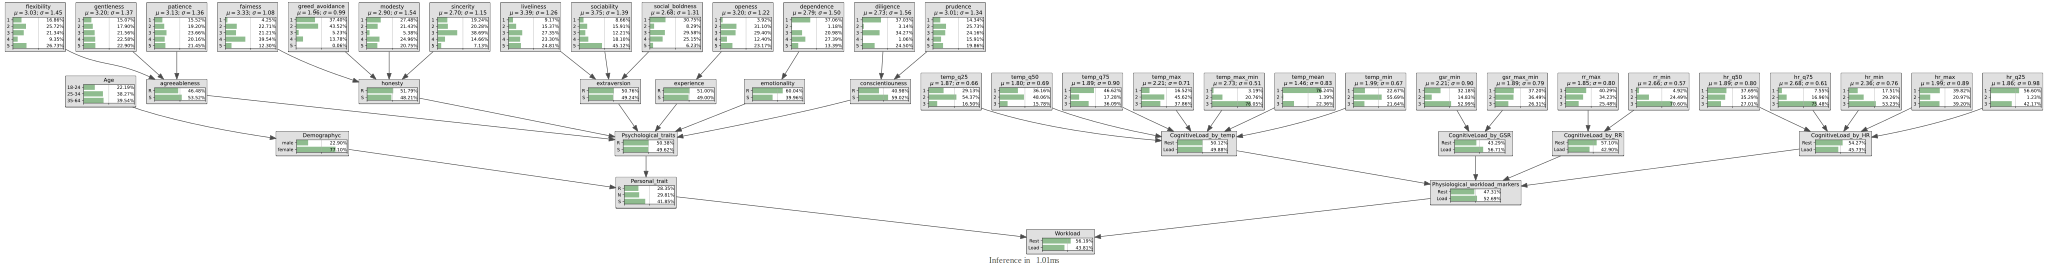

In [3]:
gnb.showInference(bn, evs={}, size='45')

In [4]:
data = pd.read_csv('join_data_v2.csv')

In [5]:
def transform_value(value, q25, q50, q75):
    if value <= q25:
        return 1
    elif value <= q75:
        return 2
    else:
        return 3
    

data_fix = data.copy()
for col in ['rr_sd1', 'rr_sd2', 'rr_sd', 'rr_mean','rr_min', 'rr_max', 'rr_q25', 'rr_q50', 'rr_q75', 'rr_max_min', 'hr_sd','hr_mean', 'hr_min', 'hr_max', 'hr_q25', 'hr_q50', 'hr_q75', 'hr_max_min', 'gsr_sd', 'gsr_mean', 'gsr_min', 'gsr_max', 'gsr_q25', 'gsr_q50', 'gsr_q75', 'gsr_max_min', 'temp_sd', 'temp_mean', 'temp_min','temp_max', 'temp_q25', 'temp_q50', 'temp_q75', 'temp_max_min']:
    q25, q50, q75 = np.percentile(data_fix[col], [25, 50, 75]) # calculate the quartiles
    data_fix[col] = data_fix[col].apply(lambda x: transform_value(x, q25, q50, q75)) # apply the value transformation function


In [6]:
data_fix = data_fix[data_fix["type"] != 1]

In [7]:
cols_of_interest = ["rr_max", "rr_min", "type"]
subset_df = data_fix[cols_of_interest]

# Group the DataFrame by the three columns of interest and count the number of occurrences
counts_df = subset_df.groupby(cols_of_interest).size().reset_index(name="count")

# Print the resulting DataFrame
print(counts_df)
print('MAX: ', counts_df['rr_max'][10], ', MIN: ', counts_df['rr_min'][10], ', TYPE: ', counts_df['type'][10], ', Count: ', counts_df['count'][10])


    rr_max  rr_min  type   count
0        1       1     0   72004
1        1       1     2   88006
2        1       2     0   10791
3        1       2     2   34542
4        2       1     0   19118
5        2       1     2   14035
6        2       2     0  160067
7        2       2     2  203945
8        2       3     0   12906
9        2       3     2   26824
10       3       1     0    1109
11       3       1     2    1151
12       3       2     0   10660
13       3       2     2   18438
14       3       3     0   64690
15       3       3     2  126229
MAX:  3 , MIN:  1 , TYPE:  0 , Count:  1109


In [8]:
for index, row in counts_df.iloc[::2].iterrows():
    # Print the row
    print('MAX: ', counts_df['rr_max'][index], ', MIN: ', counts_df['rr_min'][index], ', Count: ', counts_df['count'][index],'; ',counts_df['count'][index+1])
    strint = {'rr_min': int(counts_df['rr_min'][index]), 'rr_max':int(counts_df['rr_max'][index+1])}
    print (strint)

MAX:  1 , MIN:  1 , Count:  72004 ;  88006
{'rr_min': 1, 'rr_max': 1}
MAX:  1 , MIN:  2 , Count:  10791 ;  34542
{'rr_min': 2, 'rr_max': 1}
MAX:  2 , MIN:  1 , Count:  19118 ;  14035
{'rr_min': 1, 'rr_max': 2}
MAX:  2 , MIN:  2 , Count:  160067 ;  203945
{'rr_min': 2, 'rr_max': 2}
MAX:  2 , MIN:  3 , Count:  12906 ;  26824
{'rr_min': 3, 'rr_max': 2}
MAX:  3 , MIN:  1 , Count:  1109 ;  1151
{'rr_min': 1, 'rr_max': 3}
MAX:  3 , MIN:  2 , Count:  10660 ;  18438
{'rr_min': 2, 'rr_max': 3}
MAX:  3 , MIN:  3 , Count:  64690 ;  126229
{'rr_min': 3, 'rr_max': 3}


# BN

In [9]:
'''
bn = gum.fastBN(                               
                'rr_min{1|2|3}->CognitiveLoad_by_RR{1|0};' +
                'rr_max{1|2|3}->CognitiveLoad_by_RR{1|0};' +
                
                'hr_min{1|2|3}->CognitiveLoad_by_HR{1|0};' +
                'hr_max{1|2|3}->CognitiveLoad_by_HR{1|0};' +
                'hr_q25{1|2|3}->CognitiveLoad_by_HR{1|0};' +
                'hr_q50{1|2|3}->CognitiveLoad_by_HR{1|0};' +
                'hr_q75{1|2|3}->CognitiveLoad_by_HR{1|0};' +
                
                'temp_mean{1|2|3}->CognitiveLoad_by_temp{1|0};' +
                'temp_min{1|2|3}->CognitiveLoad_by_temp{1|0};' +
                'temp_q25{1|2|3}->CognitiveLoad_by_temp{1|0};' +
                'temp_q50{1|2|3}->CognitiveLoad_by_temp{1|0};' +
                'temp_q75{1|2|3}->CognitiveLoad_by_temp{1|0};' +
                'temp_max{1|2|3}->CognitiveLoad_by_temp{1|0};' +
                'temp_max_min{1|2|3}->CognitiveLoad_by_temp{1|0};' +
                
                'gsr_min{1|2|3}->CognitiveLoad_by_GSR{1|0};' +
                'gsr_max_min{1|2|3}->CognitiveLoad_by_GSR{1|0};' +
              
                'CognitiveLoad_by_RR->Physiological_workload_markers{0%|25%|50%|75%|100%};' +
                'CognitiveLoad_by_HR->CognitiveLoad;' +
                'CognitiveLoad_by_temp->CognitiveLoad;' +
                'CognitiveLoad_by_GSR->CognitiveLoad;'
               
                
                )


gnb.sideBySide(gnb.getInference(bn, size='50'))'''

"\nbn = gum.fastBN(                               \n                'rr_min{1|2|3}->CognitiveLoad_by_RR{1|0};' +\n                'rr_max{1|2|3}->CognitiveLoad_by_RR{1|0};' +\n                \n                'hr_min{1|2|3}->CognitiveLoad_by_HR{1|0};' +\n                'hr_max{1|2|3}->CognitiveLoad_by_HR{1|0};' +\n                'hr_q25{1|2|3}->CognitiveLoad_by_HR{1|0};' +\n                'hr_q50{1|2|3}->CognitiveLoad_by_HR{1|0};' +\n                'hr_q75{1|2|3}->CognitiveLoad_by_HR{1|0};' +\n                \n                'temp_mean{1|2|3}->CognitiveLoad_by_temp{1|0};' +\n                'temp_min{1|2|3}->CognitiveLoad_by_temp{1|0};' +\n                'temp_q25{1|2|3}->CognitiveLoad_by_temp{1|0};' +\n                'temp_q50{1|2|3}->CognitiveLoad_by_temp{1|0};' +\n                'temp_q75{1|2|3}->CognitiveLoad_by_temp{1|0};' +\n                'temp_max{1|2|3}->CognitiveLoad_by_temp{1|0};' +\n                'temp_max_min{1|2|3}->CognitiveLoad_by_temp{1|0};' +\n           

In [10]:
values = ['rr_min',
'rr_max',
'hr_min',
'hr_max',
'hr_q25',
'hr_q50',
'hr_q75',
'gsr_min',
'gsr_max_min',
'temp_mean',
'temp_min',
'temp_max',
'temp_q25',
'temp_q50',
'temp_q75',
'temp_max_min']

# Iterate through the list
for value in values:
    #print(value)
    count = data_fix[value].value_counts().sort_index().values.tolist()
    bn.cpt(value)[:] = count/ np.sum(count)


In [11]:
'''name = 'hr_min'
value = data_fix[name].value_counts().sort_index().values.tolist()

#NEW = 

# Print the resulting list
print(value)'''
gnb.sideBySide(gnb.getInference(bn, size='50'))

In [12]:
'''bn.cpt('CognitiveLoad_by_RR')[{ 'rr_min': 0, 'rr_max':0}] = [0.9, 0.1]
variable = 42  # Replace with your variable

# Check the type of the variable
variable_type = type(variable)

# Print the type
print(variable_type)'''

"bn.cpt('CognitiveLoad_by_RR')[{ 'rr_min': 0, 'rr_max':0}] = [0.9, 0.1]\nvariable = 42  # Replace with your variable\n\n# Check the type of the variable\nvariable_type = type(variable)\n\n# Print the type\nprint(variable_type)"

In [13]:
cols_of_interest_temp = ['temp_mean','temp_min','temp_max','temp_q25','temp_q50','temp_q75','temp_max_min', 'type']
subset_df_temp = data_fix[cols_of_interest_temp]
counts_df_temp = subset_df_temp.groupby(cols_of_interest_temp).size().reset_index(name="count")

for index, row in counts_df_temp.iloc[::2].iterrows():
    # Print the row
    rest = (counts_df_temp['count'][index])
    stress = (counts_df_temp['count'][index+1])
    prob = [rest, stress]
    prob = prob/np.sum(prob)
    
    #print (subset_df_temp['temp_max'][index],subset_df_temp['temp_min'][index],prob)
    #print(type(counts_df['rr_min'][index]))
    max_ind = counts_df_temp['temp_max'][index]-1
    min_ind = counts_df_temp['temp_min'][index]-1
    q25_ind = counts_df_temp['temp_q25'][index]-1
    q50_ind = counts_df_temp['temp_q50'][index]-1
    q75_ind = counts_df_temp['temp_q75'][index]-1
    mean_ind = counts_df_temp['temp_mean'][index]-1
    min_max_ind = counts_df_temp['temp_max_min'][index]-1
    
    value_bn = {'temp_mean': int(mean_ind), 'temp_max_min': int(min_max_ind), 'temp_min': int(min_ind), 'temp_max': int(max_ind), 'temp_q25': int(q25_ind),'temp_q50': int(q50_ind), 'temp_q75': int(q75_ind)}
    #print(value_bn, prob)
    bn.cpt('CognitiveLoad_by_temp')[value_bn] = prob
    #print ('finish')


In [14]:
cols_of_interest_gsr = ['gsr_min','gsr_max_min', 'type']
subset_df_gsr = data_fix[cols_of_interest_gsr]

# Group the DataFrame by the three columns of interest and count the number of occurrences
counts_df_gsr = subset_df_gsr.groupby(cols_of_interest_gsr).size().reset_index(name="count")


for index, row in counts_df_gsr.iloc[::2].iterrows():
    # Print the row
    rest = (counts_df_gsr['count'][index])
    stress = (counts_df_gsr['count'][index+1])
    prob = [rest, stress]
    prob = prob/np.sum(prob)
    
    #print (counts_df['rr_max'][index],counts_df['rr_min'][index],prob)
    #print(type(counts_df['rr_min'][index]))
    min_max_ind = counts_df_gsr['gsr_max_min'][index]-1
    min_ind = counts_df_gsr['gsr_min'][index]-1
    
    value_bn = {'gsr_max_min': int(min_max_ind), 'gsr_min':int(min_ind)}
    bn.cpt('CognitiveLoad_by_GSR')[value_bn] = prob
    #print ('finish')


In [15]:
cols_of_interest_rr = ["rr_max", "rr_min", "type"]
subset_df_rr = data_fix[cols_of_interest_rr]

# Group the DataFrame by the three columns of interest and count the number of occurrences
counts_df_rr = subset_df_rr.groupby(cols_of_interest_rr).size().reset_index(name="count")


for index, row in counts_df_rr.iloc[::2].iterrows():
    # Print the row
    rest = (counts_df_rr['count'][index])
    stress = (counts_df_rr['count'][index+1])
    prob = [rest, stress]
    prob = prob/np.sum(prob)
    
    #print (counts_df['rr_max'][index],counts_df['rr_min'][index],prob)
    #print(type(counts_df['rr_min'][index]))
    max_ind = counts_df_rr['rr_max'][index]-1
    min_ind = counts_df_rr['rr_min'][index]-1
    
    value_bn = {'rr_max': int(max_ind), 'rr_min':int(min_ind)}
    bn.cpt('CognitiveLoad_by_RR')[value_bn] = prob
    #print ('finish')


In [16]:
cols_of_interest_hr = ['hr_min', 'hr_max', 'hr_q25','hr_q50', 'hr_q75', 'type']
subset_df_hr = data_fix[cols_of_interest_hr]
counts_df_hr = subset_df_hr.groupby(cols_of_interest_hr).size().reset_index(name="count")

for index, row in counts_df_hr.iloc[::2].iterrows():
    # Print the row
    rest = (counts_df_hr['count'][index])
    stress = (counts_df_hr['count'][index+1])
    prob = [rest, stress]
    prob = prob/np.sum(prob)
    
    #print (counts_df['rr_max'][index],counts_df['rr_min'][index],prob)
    #print(type(counts_df['rr_min'][index]))
    max_ind = counts_df_hr['hr_max'][index]-1
    min_ind = counts_df_hr['hr_min'][index]-1
    q25_ind = counts_df_hr['hr_q25'][index]-1
    q50_ind = counts_df_hr['hr_q50'][index]-1
    q75_ind = counts_df_hr['hr_q75'][index]-1
    
    value_bn = {'hr_min': int(min_ind), 'hr_max': int(max_ind), 'hr_q25': int(q25_ind),'hr_q50': int(q50_ind), 'hr_q75': int(q75_ind)}
    bn.cpt('CognitiveLoad_by_HR')[value_bn] = prob
    #print ('finish')


In [17]:
for i in range(0, 2): #RR
    for j in range(0, 2): #HR
        for k in range(0, 2): #GSR
            for l in range(0, 2): #TEMP
                val = [i,j,k,l]
                count_0 = val.count(0)
                count_1 = val.count(1)
                total = count_0+count_1
                prob_sum = [count_0/total, count_1/total]
  
                bn.cpt('Physiological_workload_markers')[{'CognitiveLoad_by_RR': i, 'CognitiveLoad_by_HR': j, 'CognitiveLoad_by_GSR': k, 'CognitiveLoad_by_temp': l}] = prob_sum

In [18]:
#Age + sex + Demographycc
demogr = pd.read_csv('age_sex.csv')
#count = data_fix[value].value_counts().sort_index().values.tolist()
bn.cpt('Age')[:] = (demogr['Total']/np.sum(demogr['Total'])).sort_index().values.tolist()
m = np.sum(demogr['Males'])
f = np.sum(demogr['Females'])
total = m+f
#bn.cpt('Sex')[:] = [m/total, f/total]
#print(total)
#print ((demogr['Total']/np.sum(demogr['Total'])).sort_index().values.tolist())
#print (np.sum(demogr['Males']))
#print (demogr['Females'][2]/np.sum(demogr['Total'][2]))

for i in range(0, 3): #age
    # Print the row
    m = (demogr['Males'][i])
    f = (demogr['Females'][i])
    total = m+f
    prob = [m/total, f/total]
    print(prob)

    #value_bn = {'Age': i, 'Sex': j}
    bn.cpt('Demographyc')[{'Age': i}] = prob

[0.5157511436413541, 0.48424885635864595]
[0.5108198238887263, 0.48918017611127373]
[0.49530252342309816, 0.5046974765769018]


In [19]:
person = pd.read_csv('personality_for_bn1.csv')
person.head()

user  age  sex_male  dependence  emotionality  openess  experience  \
0  1mpau   37         1           3             3        4           4   
1  2nxs5   21         0           3             3        3           3   
2  3caqi   24         1           5             5        2           2   
3  5gpsc   27         1           2             2        3           3   
4  6frz4   22         1           2             2        4           4   

   sincerity  fairness  greed_avoidance  ...  patience  agreeableness  \
0          4         3                4  ...         3              3   
1          3         3                2  ...         4              3   
2          2         4                4  ...         3              3   
3          4         3                5  ...         5              4   
4          3         2                4  ...         4              3   

   diligence  prudence  conscientiousness  load  relax  state  tlx_bool  tlx  
0          3         4                  4     4      3      2         0   14  
1          3         4                  3     3      3      1         0   14  
2          4         2                  3     3      3      1         0   14  
3          3         3                  3     3      3      1         1   17  
4          5         3                  4     3      3      1         1   19  

[5 rows x 28 columns]

In [20]:


trait = ['diligence',
'prudence',
'flexibility',
'gentleness',
'patience',
'fairness',
'greed_avoidance',
'modesty',
'sincerity',
'liveliness',
'sociability',
'social_boldness',
'openess',
'dependence']
all_values = range(1, 6)
# Iterate through the list
for value in trait:
    #print(value)
    count = person[value].value_counts().sort_index()#.values.tolist()
    count = count.reindex(all_values, fill_value=0).values.tolist()
    bn.cpt(value)[:] = count/ np.sum(count)


In [21]:

for i in range(0, 5):
    #experience
    if person['openess'][i] >=3 :
        prob = [0.9, 0.1]
    else:
        prob = [0.5, 0.5]
    bn.cpt('experience')[{'openess': i}] = prob
    

for i in range(0, 5):
    #emotionality
    bn.cpt('emotionality')[{'dependence': i}] = [0.5, 0.5]

for i in range(0, 5):
    for j in range(0, 5):
        for k in range(0, 5):
            #extraversion
            stress = person['social_boldness'][i] + person['sociability'][j]
            rest = person['liveliness'][k]
            if stress >= rest:
                prob = [0.33, 0.67]
            else:
                prob = [0.67, 0.33]
            bn.cpt('extraversion')[{'social_boldness': i, 'sociability': j, 'liveliness': k}] = prob    

for i in range(0, 5):
    for j in range(0, 5):
        for k in range(0, 5):
            for l in range(0, 5):
                #honesty
                stress = person['fairness'][l] + person['greed_avoidance'][j] + person['modesty'][i]
                rest = person['sincerity'][k] + person['fairness'][l]
                if stress >= rest:
                    prob = [0.4, 0.6]
                else:
                    prob = [0.6, 0.4]
                bn.cpt('honesty')[{'modesty': i, 'greed_avoidance': j, 'sincerity': k, 'fairness': l}] = prob 

for i in range(0, 5):
    for j in range(0, 5):
        for k in range(0, 5):
            #agreeableness
            stress = person['gentleness'][j]
            rest = person['flexibility'][i] + person['patience'][k]
            if stress >= rest:
                prob = [0.33, 0.67]
            else:
                prob = [0.67, 0.33]
            bn.cpt('agreeableness')[{'flexibility': i, 'gentleness': j, 'patience': k}] = prob  
            
for i in range(0, 5):
    for j in range(0, 5):
        #conscientiouness
        stress = person['diligence'][i] + person['prudence'][j]
        if stress >= 5:
            prob = [0.1, 0.9]
        else:
            prob = [0.5, 0.5]
        bn.cpt('conscientiouness')[{'diligence': i, 'prudence': j}] = prob 


In [22]:
for i in range(0, 2): #experience
    for j in range(0, 2): #emotionality
        for k in range(0, 2): #extraversion
            for l in range(0, 2): #honesty
                for m in range(0, 2): #agreeableness
                    for n in range(0, 2): #conscientiouness
                        val = [i,j,k,l,m,n]
                        count_0 = val.count(0)
                        count_1 = val.count(1)
                        total = count_0+count_1
                        bn_val = {'experience': i, 'emotionality': j, 'extraversion': k, 'honesty': l, 'agreeableness': m, 'conscientiouness': n} 
                        bn.cpt('Psychological_traits')[bn_val] = [count_0/total, count_1/total]
                        

In [23]:
import itertools

col_person = ['sex_male', 'state', 'tlx_bool']
subset_df_person = person[col_person]
df_person = subset_df_person.groupby(col_person).size().reset_index(name="count")
df_person

# Generate all possible combinations of values and Convert the combinations into a DataFrame
combinations = list(itertools.product([0, 1], [0, 1, 2], [0, 1]))
combinations_df = pd.DataFrame(combinations, columns=df_person.columns[:-1])

merged_df = pd.merge(df_person, combinations_df, on=df_person.columns[:-1].tolist(), how='right')

# Fill missing values with 0 for the count column
merged_df['count'] = merged_df['count'].fillna(0)
merged_df = merged_df[df_person.columns]

#print(merged_df)
merged_df = merged_df.sort_values('tlx_bool').reset_index(drop=True)
#print(merged_df)
for index, row in merged_df.iloc[::3].iterrows():
    value_bn = {'Psychological_traits': int(merged_df['tlx_bool'][index]), 'Demographyc': int(merged_df['sex_male'][index])}
    prob = [merged_df['count'][index], merged_df['count'][index+1], merged_df['count'][index+2]]
    prob = prob/np.sum(prob)
    #print(value_bn, prob)
    bn.cpt('Personal_trait')[value_bn] = prob
    

In [24]:
#gnb.sideBySide(gnb.getInference(bn, size='50'))

In [25]:
for i in range(0, 3): #Personal_trait
    for j in range(0, 2): #Physiological_workload_markers
        #print(gum.getPosterior(bn, {}, 'Personal_trait')[i],gum.getPosterior(bn, {}, 'Physiological_workload_markers')[j])
        person = gum.getPosterior(bn, {}, 'Personal_trait')[i]
        wload = gum.getPosterior(bn, {}, 'Physiological_workload_markers')[j]
        t = person+wload - wload*person
        f = 1 - t
        prob = [t, f]
        if j == 1:
            prob = [f, t]
        value_bn = {'Personal_trait': i, 'Physiological_workload_markers': j}
        print (value_bn, prob)
        bn.cpt('Workload')[value_bn] = prob

{'Personal_trait': 0, 'Physiological_workload_markers': 0} [0.4701354778927411, 0.5298645221072589]
{'Personal_trait': 0, 'Physiological_workload_markers': 1} [0.42544401608874194, 0.5745559839112581]
{'Personal_trait': 1, 'Physiological_workload_markers': 0} [0.8708823732548232, 0.1291176267451768]
{'Personal_trait': 1, 'Physiological_workload_markers': 1} [0.1036723905421153, 0.8963276094578847]
{'Personal_trait': 2, 'Physiological_workload_markers': 0} [0.5496766189178827, 0.45032338108211734]
{'Personal_trait': 2, 'Physiological_workload_markers': 1} [0.36157806343458965, 0.6384219365654104]


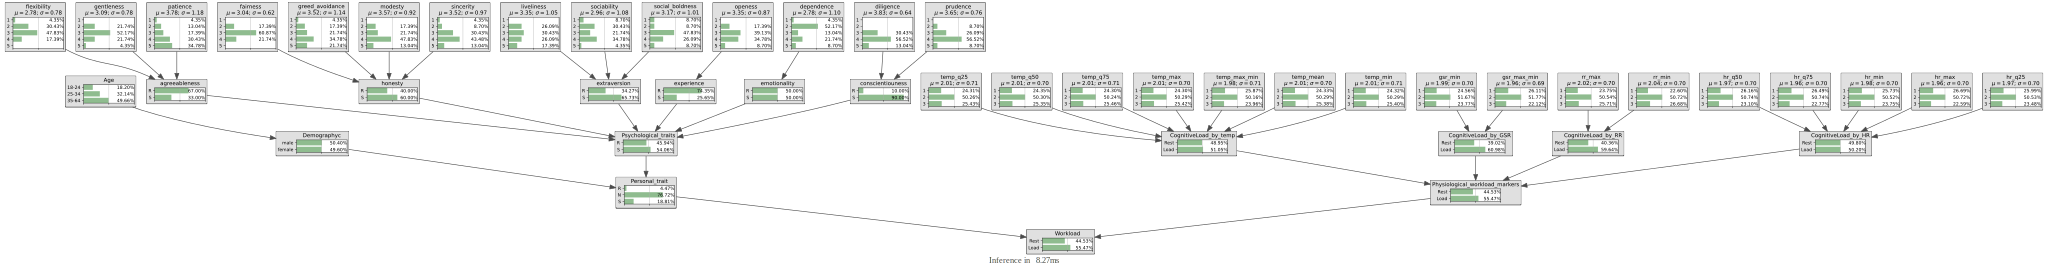

In [26]:
gnb.showInference(bn, evs={}, size='45')

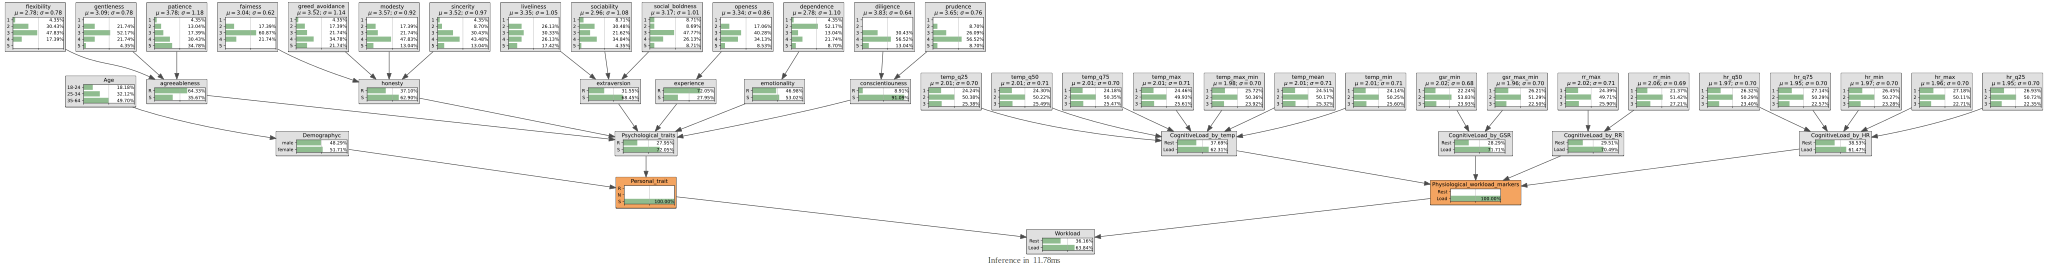

In [31]:
evs = {'Personal_trait': 2, 'Physiological_workload_markers': 1}
#gnb.showInference(bn, size='10', evs=evs)

gnb.showInference(bn, evs=evs, size='45')

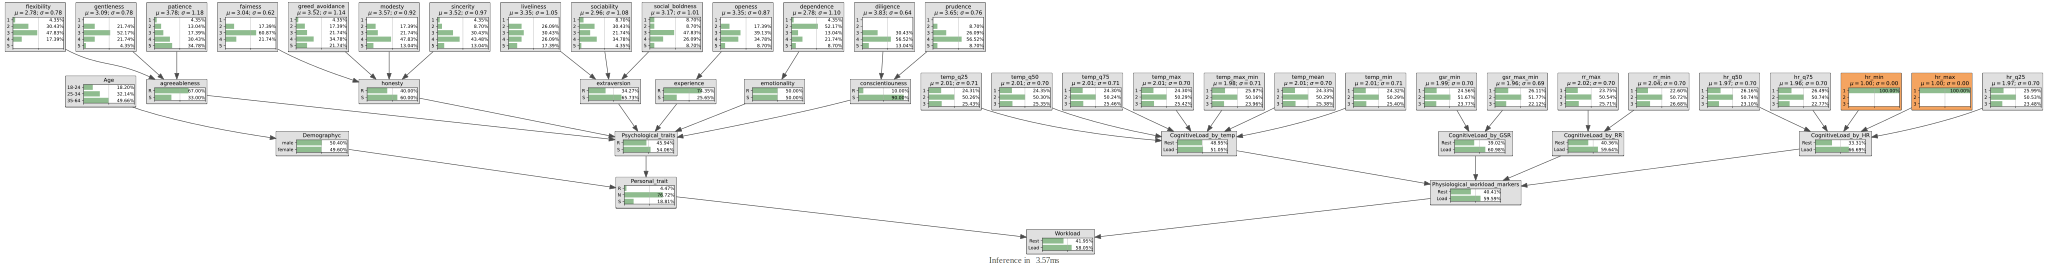

In [28]:
evs = {'hr_min': 0, 'hr_max' : 0}
#gnb.showInference(bn, size='10', evs=evs)

gnb.showInference(bn, evs=evs, size='45')

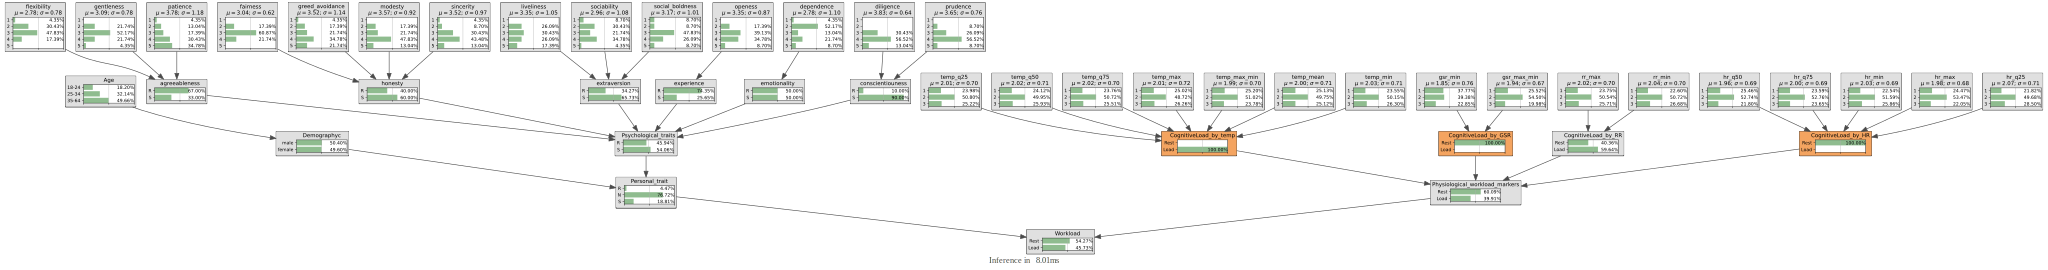

In [29]:
evs = {'CognitiveLoad_by_temp': 1, 'CognitiveLoad_by_GSR': 0, 'CognitiveLoad_by_HR' : 0}
#gnb.showInference(bn, size='10', evs=evs)

gnb.showInference(bn, evs=evs, size='45')